In [1]:
import numpy as np
import cv2
import sys

### 동영상 처리

In [ ]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("video open failed")
    sys.exit()
    
w = round(cv2.get(cv2.CAP_PROP_FRAME_WIDTH))
h = round(cv2.get(cv2.CAP_PROP_FRAME_HEIGHTH))
# 0.7 곱하는 이유가 1은 빨리감는 느낌이 남
fps = round(cv2.get(cv2.CAP_PROP_FPS) * 0.7)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter("output1.avi", fourcc, fps, (w, h))

while 1:
    retval, frame = cap.read()
    
    if not retval:
        print("video read failed")
        break
    
    edge = cv2.Canny(frame, 50, 150) # grayscale
    edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR) # convert gray to bgr
    
    out.write(frame) # color 저장
    out.write(edge) # edge 저장
    
    cv2.imshow("edge", edge)
    cv2.imshow("frame", frame)
    
    if cv2.waitKey(30) == 27:
        break
        
cap.release()
cv2.destroyAllWindows()

### 키보드 이벤트

In [ ]:
img = cv2.imread("./images/field.bmp", 0)

cv2.imshow("img", img)

while 1:
    key = cv2.waitKey()
    
    if key == ord("i"):
        img =~ img
        cv2.imshow("img", img)
    elif key == ord("e"):
        img = cv2.Canny(img, 50, 150)
        cv2.imshow("img", img)
    elif key == 27:
        break
    elif key == ord("s"):
        cv2.imwrite("./images/field1.png", img)

# cv2.waitKey()
cv2.destroyAllWindows()

### 마우스 이벤트

In [2]:
oldx, oldy = -1, -1

def call_mouse(event, x, y, flags, param):
    global oldx, oldy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 0), 5, 
                    cv2.LINE_AA)
            cv2.imshow("img", img)
            oldx, oldy = x, y
#     elif event == cv2.EVENT_LBUTTONUP:
#         print(x, y)
    
img = np.ones((480, 600, 3), np.uint8) * 255 # numpy 세로 부터

cv2.namedWindow("img")
cv2.setMouseCallback("img", call_mouse, img) # img가 정의된 함수의 param으로

cv2.imshow("img", img)

cv2.waitKey()
cv2.destroyAllWindows()

### 트랙바

In [2]:
def call_trackbar(x):
    img[:] = x
    cv2.imshow("img", img)

img = np.zeros((480, 600), np.uint8)

cv2.namedWindow("img")
cv2.createTrackbar("level", "img", 0, 255, call_trackbar)

cv2.imshow("img", img)

cv2.waitKey()
cv2.destroyAllWindows()

### 영상의 화소처리

In [8]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

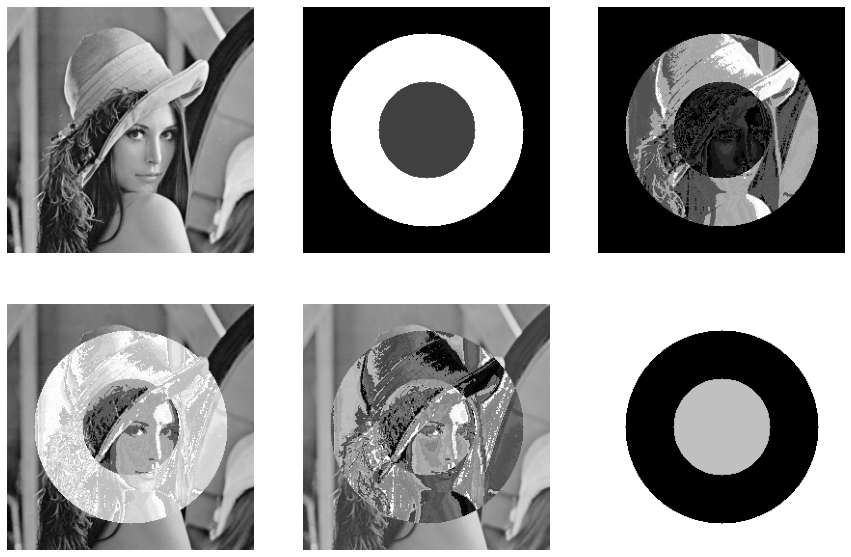

In [10]:
src1 = cv2.imread("./fig/lenna256.bmp", 0)
src2 = np.zeros_like(src1, np.uint8)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.bitwise_and(src1, src2)
dst2 = cv2.bitwise_or(src1, src2)
dst3 = cv2.bitwise_xor(src1, src2)
dst4 = cv2.bitwise_not(src2)

plt.figure(figsize = (15, 10))

plt.subplot(231), plt.imshow(src1, "gray"), plt.axis("off")
plt.subplot(232), plt.imshow(src2, "gray"), plt.axis("off")
plt.subplot(233), plt.imshow(dst1, "gray"), plt.axis("off")
plt.subplot(234), plt.imshow(dst2, "gray"), plt.axis("off")
plt.subplot(235), plt.imshow(dst3, "gray"), plt.axis("off")
plt.subplot(236), plt.imshow(dst4, "gray"), plt.axis("off")

plt.show()

# cv2.imshow("src1", src1)
# cv2.imshow("src2", src2)

# cv2.waitKey()
# cv2.destroyAllWindows()

### split and merge

In [14]:
src = cv2.imread("./fig/flowers.jpg", 1)

if src is None:
    sys.exit("image read failed")

# cv2.split(src)
# m : 다채널 컬러 영상    
# mv : 출력 영상
# dst : 출력 영상의 리스트
# blue, green, red = cv2.split(src) # b, g, r의 수치를 뽑아옴
# 10라인 = 12~14라인
# blue = src[:, :, 0]
# green = src[:, :, 1]
# red = src[:, :, 2]

# print(type(blue)) numpy.ndarray

# dst = cv2.merge([blue, green, red])

# cv2.imshow("img", src)
# cv2.imshow("blue", blue)
# cv2.imshow("green", green)
# cv2.imshow("red", red)
# cv2.imshow("dst", dst)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

cv2.imshow("img", src)
cv2.imshow("hue", h)
cv2.imshow("sat", s)
cv2.imshow("val", v)

cv2.waitKey()
cv2.destroyAllWindows()

### 이미지를 히스토그램으로 분석

In [1]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

In [52]:
src = cv2.imread("./fig/lenna.bmp", cv2.IMREAD_GRAYSCALE)
src_mod = cv2.add(src, 50)
src_mod

array([[212, 212, 212, ..., 220, 205, 178],
       [212, 212, 212, ..., 220, 205, 178],
       [212, 212, 212, ..., 220, 205, 178],
       ...,
       [ 93,  93, 100, ..., 154, 150, 148],
       [ 94,  94, 105, ..., 154, 155, 158],
       [ 94,  94, 105, ..., 154, 155, 158]], dtype=uint8)

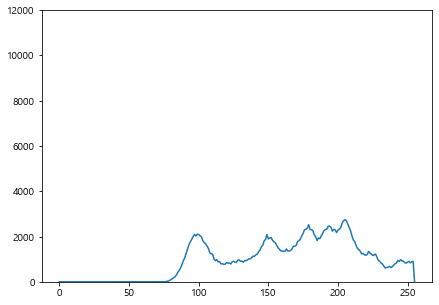

In [53]:
# src = cv2.imread("./fig/lenna.bmp", 0)

# cv2.imshow("src", src)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스토그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True
hist = cv2.calcHist([src_mod], [0], None, [256], [0, 255])

plt.figure(figsize = (7, 5))
plt.ylim(0, 12000)
plt.plot(hist)
plt.show()

# cv2.waitKey()
# cv2.destroyAllWindows()

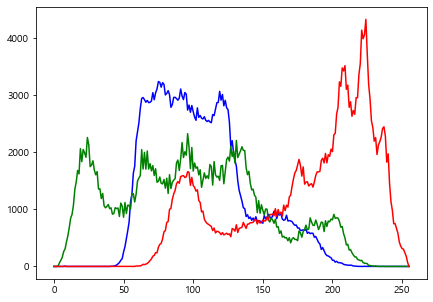

In [6]:
src = cv2.imread("./fig/lenna.bmp", 1)

b_hist = cv2.calcHist([src], [0], None, [256], [0, 255])
g_hist = cv2.calcHist([src], [1], None, [256], [0, 255])
r_hist = cv2.calcHist([src], [2], None, [256], [0, 255])

plt.figure(figsize = (7, 5))
plt.plot(b_hist, "blue")
plt.plot(g_hist, "green")
plt.plot(r_hist, "red")
plt.show()

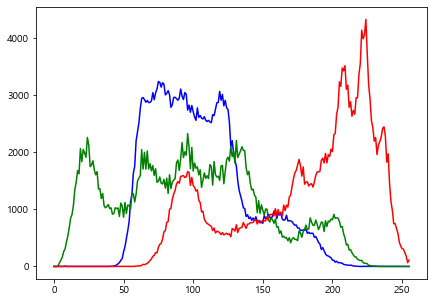

In [4]:
# 다른 방법
src = cv2.imread("./fig/lenna.bmp", 1)

bgr_planes = cv2.split(src)

colors = ["b", "g", "r"]
plt.figure(figsize = (7, 5))
for (p, c) in zip(bgr_planes, colors): # zip = 하나씩 가져와
    hist = cv2.calcHist([p], [0], None, [256], [0, 256])
    plt.plot(hist, color = c)
plt.show()

### stretching

In [85]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

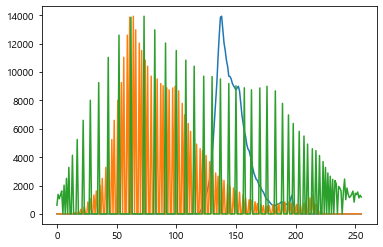

In [86]:
src = cv2.imread("./fig_4/Hawkes.jpg", 0)

smin, smax, min_loc, max_loc = cv2.minMaxLoc(src)
# print(smin, smax)
# print(min_loc, max_loc)

# dst = np.clip((src - smin) / (smax - smin) * 255 + 0, 0, 255).\
# astype(np.uint8)

# cv2.normalize(src, dst=None, alpha=None, beta=None, norm_type=None, 
# dtype=None, mask=None) -> dst
# src: 입력영상
# dst: 결과영상
# alpha: 정규화 최소값 (예, 0)
# beta: 정규화 최댓값 (예, 155)
# norm_type: cv2.NORM_MINMAX
# dtype =  -1, src와 같은 type
dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
# equalizeHist(src, dst=None) -> dst
# src: 입력영상,gray scale 영상만 가능
dst_equal = cv2.equalizeHist(src)

hist_src = cv2.calcHist([src], [0], None, [256], [0, 256])
# hist_dst = cv2.calcHist([dst], [0], None, [256], [0, 256])
hist_norm = hist = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])

plt.plot(hist_src)
# plt.plot(hist_dst)
plt.plot(hist_norm)
plt.plot(hist_equal)
plt.show()

cv2.imshow("src", src)
# cv2.imshow("dst", dst)
cv2.imshow("dst_norm", dst_norm)
cv2.imshow("dst_equal", dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()